# Introducción a Python para la Econometría

Este notebook está ideado para la asignatura ECONOMETRÍA del Doble Grado en Admnistración y Dirección de Empresas e Ingenierías (Informática, Civil y Edificación) de la Universidad de Granada. 

## Markdown en Jupyter notebooks

[markdown](https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html) 

[LaTeX](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

## Estilo Python

[Python](https://docs.python-guide.org/writing/style/)

# Modificando Estilo de Texto

Esto es un texto plano en Jupyter.


# Título
## Cabecera
### Subcabecera
#### 4o nivel


__negrita__ or **negrita**

_cursiva_ or *cursiva*

Símbolos matemáticos: $\delta$, $\sum_{i=1}^n a_i$, $\begin{pmatrix} 1 & 2 & 3.9\\
2 & \pi & 7\\
1 & 8 & 10
\end{pmatrix}$


Listas:


Numeradas:

1. Primer elemento de la lista
1. Segundo elemento de la lista
1. Tercer elemento de la lista
    1. Con sublistas
    1. también numeradas

No numeradas:

- Primer punto
- Segundo punto
     - con un subapartado
     - o dos


<div class="alert alert-block alert-info">
<b>Nota</b> Esto es una nota en un recuadro azul. 
</div>

<img src="jupyter.png" alt="Descripción de la imagen" title="Título de la imagen" />

Línea horizontal:

***

Links: [PRADO] (https://pradogrado1920.ugr.es/course/view.php?id=11859)

In [1]:
print("Hola Jupyter!")

Hola Jupyter!


In [2]:
x = 1 #Esto es un comentario para recordar que x es 1 inicialmente
print("x=", x, "y si sumo 7 ahora tengo ", x+7)

import this

x= 1 y si sumo 7 ahora tengo  8
The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [3]:
# Serie de Fibonacci:
    # la suma de dos elementos define el siguiente
a, b = 0, 1
while b < 10:
    print(b)
    a, b = b, a+b
    
a, b = 0, 1
while b < 100:
    print(b, end= ',')
    a, b = b, a+b

1
1
2
3
5
8
1,1,2,3,5,8,13,21,34,55,89,

# Statsmodels

 [statsmodels](https://www.statsmodels.org/) 
 
 
## Un primer modelo econométrico

Primeros Datos: [stocks](https://archive.ics.uci.edu/ml/datasets/Stock+portfolio+performance)

In [10]:
import pandas as pd #librería para manejo de datos

data= pd.read_excel ('stock.xlsx') #Lee parte de la base de datos "stocks"

data.values


array([[ 1.        ,  1.        ,  0.        , ...,  0.8       ,
         0.52      ,  0.41176471],
       [ 2.        ,  0.        ,  1.        , ...,  0.41223108,
         0.52      ,  0.76470588],
       [ 3.        ,  0.        ,  0.        , ...,  0.75687943,
         0.44      ,  0.37647059],
       ...,
       [61.        ,  0.2       ,  0.        , ...,  0.36895823,
         0.52      ,  0.41176471],
       [62.        ,  0.        ,  0.2       , ...,  0.2772206 ,
         0.6       ,  0.8       ],
       [63.        ,  0.167     ,  0.167     , ...,  0.28492322,
         0.68      ,  0.8       ]])

In [9]:
import statsmodels.api as sm
# Modelo Regresión:  modeldata=stock.values 
X=data.values[:,1:7] # LArge B/P, LArge ROE, Large S/P, Large Return Rate Qt, Large Market Value, Small System Risk
y=data.values[:,8] # Anual Return


results = sm.OLS(y, sm.add_constant(X)).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     9.825
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           2.20e-07
Time:                        09:48:49   Log-Likelihood:                 245.46
No. Observations:                  63   AIC:                            -476.9
Df Residuals:                      56   BIC:                            -461.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2200      1.201     -0.183      0.8

## Un más fácil aún

In [6]:
import numpy as np

In [7]:
n=100

X= np.random.normal(0, 10, n)
Y= X + np.random.normal(0,1,n)

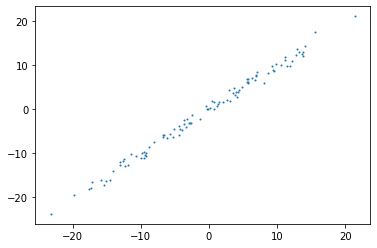

In [8]:
import matplotlib.pylab as plt

plt.scatter(X,Y, s=1)

plt.show()

In [23]:
results = sm.OLS(Y, sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          1.47e-102
Time:                        18:46:47   Log-Likelihood:                -140.30
No. Observations:                 100   AIC:                             284.6
Df Residuals:                      98   BIC:                             289.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0254      0.100      0.255      0.799      -0.172       0.223
x1             1.0037      0.010    105.114      0.000       0.985       1.023
==============================================================================
Omnibus:                        3.848   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.520
Skew:                           0.459   Prob(JB):                        0.172
Kurtosis:                       3.041   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

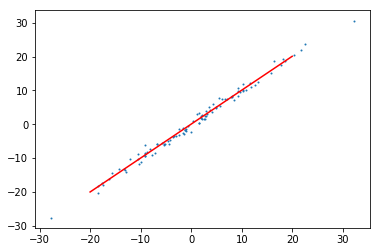

In [24]:
cte=results.params[0]
beta=results.params[1]

plt.plot([-20,20],[cte+beta*(-20), cte+beta*20], color='r')
plt.scatter(X,Y, s=1)

plt.show()

## Otros datos: Crímenes

[Datos Crimenes](https://www.statsmodels.org/dev/datasets/generated/statecrime.html)

In [25]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


data = sm.datasets.statecrime.load_pandas()
data.data

,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
California,473.4,5.4,80.6,14.2,27.8,62.7,89.73
Colorado,340.9,3.2,89.3,12.9,21.4,84.6,76.86
Connecticut,300.5,3.0,88.6,9.4,25.0,79.1,84.83
Delaware,645.1,4.6,87.4,10.8,27.6,71.9,68.71
District of Columbia,1348.9,24.2,87.1,18.4,48.0,38.7,100.00


In [26]:
data.exog

,urban,poverty,hs_grad,single
state,,,,
Alabama,48.65,17.5,82.1,29.0
Alaska,44.46,9.0,91.4,25.5
Arizona,80.07,16.5,84.2,25.7
Arkansas,39.54,18.8,82.4,26.3
California,89.73,14.2,80.6,27.8
Colorado,76.86,12.9,89.3,21.4
Connecticut,84.83,9.4,88.6,25.0
Delaware,68.71,10.8,87.4,27.6
District of Columbia,100.00,18.4,87.1,48.0


En esta base de datos se cuenta con las siguientes variables:
- state – Nombre del estado americano (51)
- violent – Tasa de crímenes violentos/ 100,000 habs. Incluye asesinatos, violaciones forzadas, robos y asaltos graves
- murder – Tasa de asesinatos/ 100,000 habs.
- hs_grad – Porcentage de poblacion con estudios superiores.
- poverty – Porcentage de personas bajo el umbral de la pobreza.
- white – Porcentage de población blanca.
- single – Porcentage de familias monoparentales.
- urban - Porcentage de población en zonas urbanizadas.

In [27]:
modeloMCO = sm.OLS(data.endog, sm.add_constant(data.exog))
resultado = modeloMCO.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     50.08
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.42e-16
Time:                        18:47:03   Log-Likelihood:                -95.050
No. Observations:                  51   AIC:                             200.1
Df Residuals:                      46   BIC:                             209.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.1024     12.086     -3.649      0.0

/Users/vblanco/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
